<a href="https://colab.research.google.com/github/cedricbansah/data-science-practice/blob/master/Linear_Regression_(week8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from __future__ import division 
%matplotlib inline
from __future__ import print_function

In [3]:
from sklearn.linear_model import LinearRegression

A predictor is a factor that influences the outcome of a target variable.

In [4]:
# Load the dataset 
data = pd.read_csv('/content/house_prices.csv')
data.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


Creating a scatter plot to determine if there is a relationship between the features of our dataset.


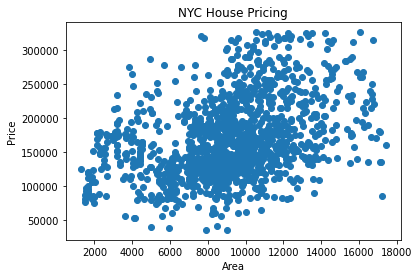

In [5]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.title('NYC House Pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

From the diagram above we can see that there is a positive correlation between SalePrice and LotArea. If we wanted to predict the price of a house whose area is 14000 sq. feet how would we go about it?

### Firtting a line on the scatter plot

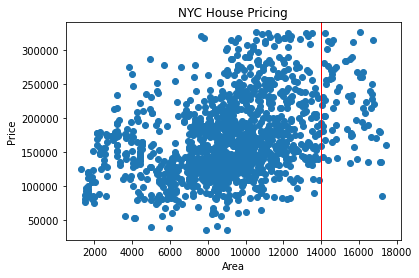

In [6]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.axvline(x=14000, linewidth=1, color='r',)
plt.title('NYC House Pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

now consider the following lines: 

𝑝𝑟𝑖𝑐𝑒=30000+15∗𝑎𝑟𝑒𝑎

𝑝𝑟𝑖𝑐𝑒=10000+17∗𝑎𝑟𝑒𝑎

𝑝𝑟𝑖𝑐𝑒=50000+12∗𝑎𝑟𝑒𝑎

Let's plot these line and see if they are a good fit.

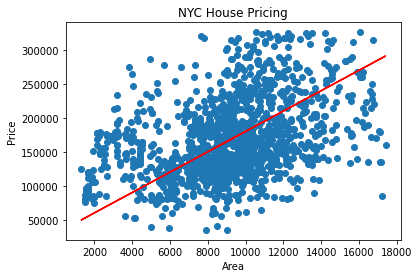

In [7]:
# plotting 𝑝𝑟𝑖𝑐𝑒=30000+15∗𝑎𝑟𝑒𝑎

plt.scatter(data['LotArea'], data['SalePrice'])
plt.plot(data['LotArea'], 30000+15*data['LotArea'], 'r-')
plt.title('NYC House Pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

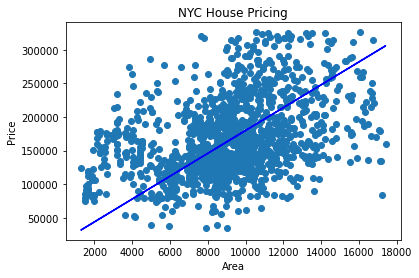

In [8]:
# plotting 𝑝𝑟𝑖𝑐𝑒=10000+17∗𝑎𝑟𝑒𝑎

plt.scatter(data['LotArea'], data['SalePrice'])
plt.plot(data['LotArea'], 10000+17*data['LotArea'], 'b-')
plt.title('NYC House Pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

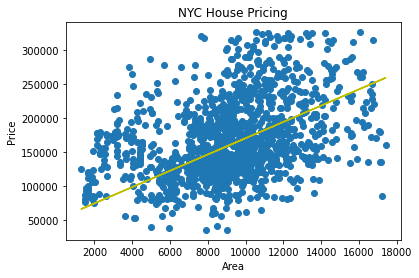

In [10]:
# plotting 𝑝𝑟𝑖𝑐𝑒=50000+12∗𝑎𝑟𝑒𝑎

plt.scatter(data['LotArea'], data['SalePrice'])
plt.plot(data['LotArea'], 50000+12*data['LotArea'], 'y-')
plt.title('NYC House Pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Seeing as all three lines seem to be good fits for the data we can plot them together

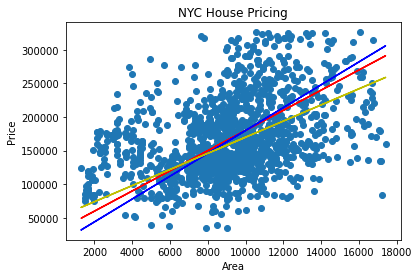

In [11]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.plot(data['LotArea'], 30000+15*data['LotArea'], 'r-')
plt.plot(data['LotArea'], 10000+17*data['LotArea'], 'b-')
plt.plot(data['LotArea'], 50000+12*data['LotArea'], 'y-')
plt.title('NYC House Pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

All three lines seem like good fits but each one of them will provide a different result. Let's take a Lot Area of 8500 for example

In [12]:
# red line: 
print("red line:", 30000 + 15*8500) # <-- Inserted value 8500 inplace of LotArea 

# black line: 
print('black line:', 10000 + 17*8500) # <-- Inserted value 8500 inplace of LotArea

# yellow line:
print('yellow line:', 50000 + 12*8500) # <-- Inserted value 8500 inplace of LotArea


red line: 157500
black line: 154500
yellow line: 152000


### Linear Regression
A function can be defined to measure how far the predicted value is from the actual value. 

(𝑌𝑝𝑟𝑒𝑑−𝑌𝑎𝑐𝑡𝑢𝑎𝑙)2

This function is known as the cost function. 

In Linear Regression, the predicoter becomes the independent variable and the target variable becomes the dependent variable.

Refer to the Week 8 Notebook [here](https://github.com/cedricbansah/26-Weeks-Of-Data-Science/blob/master/Week-08-Linear_Regression/notebooks/Week-8%20notebook.ipynb) to read more on the Gradient Descent Algorithm.

In [17]:
# using sklearn to predict values using linear regression 

X = data['LotArea'][:,np.newaxis]  # reshape
y = data['SalePrice']


# fitting simple linear regressor to the training set

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# predicting the Test set results 
y_pred = regressor.predict(X)

Plotting the best fitting line

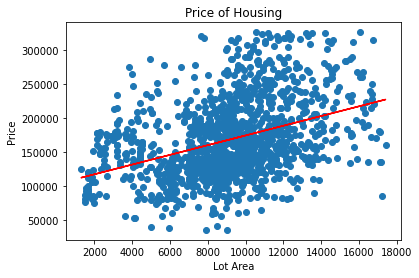

In [19]:
# Train part

plt.scatter(X, y)
plt.plot(X, y_pred, 'r-')
plt.title('Price of Housing')
plt.xlabel('Lot Area')
plt.ylabel('Price')
plt.show()

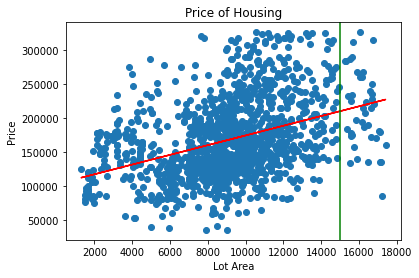

In [20]:
# predicting the price of a house with LotArea 15000

plt.scatter(X, y)
plt.plot(X, y_pred, 'r-')
plt.title('Price of Housing')
plt.xlabel('Lot Area')
plt.ylabel('Price')
plt.axvline(x=15000, c='g')

We can see that for a house whose area = 15,000 we need to pay between 200,000 and 225,000

Mulitvariate Linear Regression 

------------------------------

In Univariate Linear Regression only one independent variable to predict the price. In Multivariable Linear Regression we will use multiple independent variable to predict the Price.

In [23]:
# Loading the new dataset

housing = pd.read_csv('/content/house_prices_multivariate.csv')
print(housing.shape)
housing.head()

(1379, 35)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,2008,250000


In [24]:
# selecting dependent and independent variables 

x = housing.iloc[:,:-1]  # selecting all columns except the last(SalePrice)
y = housing['SalePrice'] 

In [25]:
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Intercept: ', regressor.intercept_)  # this is the y-intercept
print('Coefficients of predictors: ', regressor.coef_)  # these are the regression coefficients 

Intercept:  310649.26008873095
Coefficients of predictors:  [ 4.21581098e+01  4.41367617e-01  1.77089455e+04  5.84597164e+03
  3.59658315e+02  1.19385237e+02  2.59435150e+01  9.76748897e+00
  7.65860421e-01 -6.61329855e-01  9.87201953e+00  1.96567898e+01
  1.31846867e+01 -4.66155080e+00  2.81799257e+01  6.78157998e+03
  3.36169287e+02  1.40344800e+03 -2.93573021e+03 -8.64074712e+03
 -3.35073713e+04  6.10172168e+03  3.20869122e+03 -8.23684306e+01
  1.56189970e+04  9.59392447e+00  2.51559075e+01  5.60981357e-01
  1.07712460e+01  2.51081902e+01  5.36124522e+01 -4.13099007e+01
 -8.16461371e-02 -5.83097021e+02]


Predicting the price of a random house:

In [27]:
house = x.iloc[123]
house 

LotFrontage        75.0
LotArea          7388.0
OverallQual         5.0
OverallCond         6.0
YearBuilt        1959.0
YearRemodAdd     2002.0
MasVnrArea          0.0
BsmtFinSF1        405.0
BsmtFinSF2          0.0
BsmtUnfSF         658.0
TotalBsmtSF      1063.0
1stFlrSF         1327.0
2ndFlrSF            0.0
LowQualFinSF        0.0
GrLivArea        1327.0
BsmtFullBath        1.0
BsmtHalfBath        0.0
FullBath            1.0
HalfBath            0.0
BedroomAbvGr        3.0
KitchenAbvGr        1.0
TotRmsAbvGrd        7.0
Fireplaces          0.0
GarageYrBlt      1974.0
GarageCars          2.0
GarageArea        624.0
WoodDeckSF          0.0
OpenPorchSF         0.0
EnclosedPorch       0.0
3SsnPorch           0.0
ScreenPorch         0.0
PoolArea            0.0
MiscVal             0.0
YrSold           2007.0
Name: 123, dtype: float64

In [30]:
predict_house = regressor.predict(house.values.reshape(1,-1))
print('Predicted price: ', predict_house[0])
print('Actual price: ', y[123])

Predicted price:  157587.40663162223
Actual price:  150750
